<h1>Вправа 1</h1>

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets as sk_data
import sklearn.neighbors as neighbors
import sys
from scipy.stats import hmean
from sklearn.neighbors import NearestNeighbors

np.set_printoptions(suppress=True, precision=4)

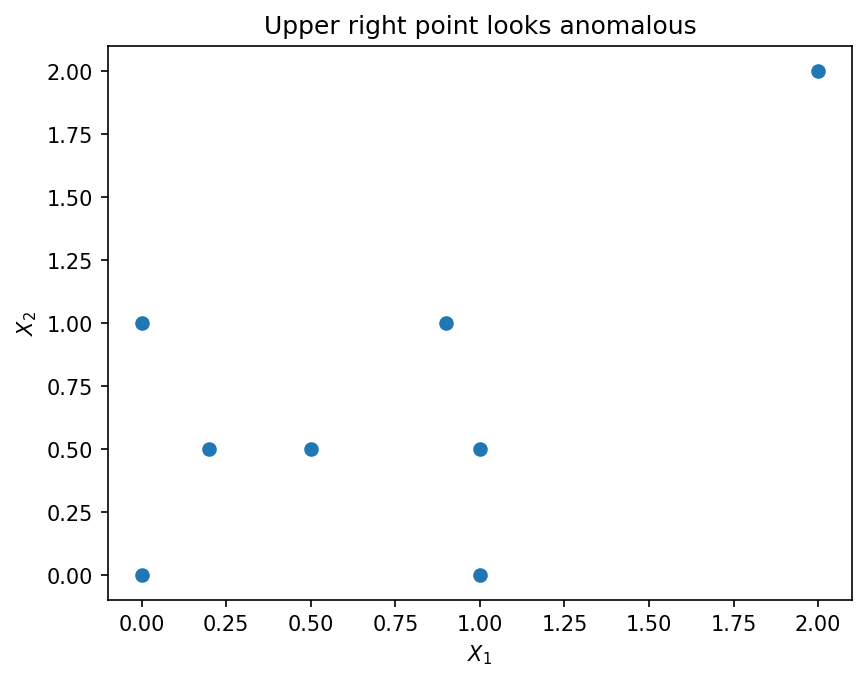

In [4]:
X = np.array([[0.9, 1], [0, 1], [1, 0], [0, 0], [0.5, 0.5], [0.2, 0.5], [1, 0.5], [2, 2]])

plt.figure(dpi=150)
plt.title('Upper right point looks anomalous')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.plot(X[:, 0], X[:, 1], 'o');
plt.show()

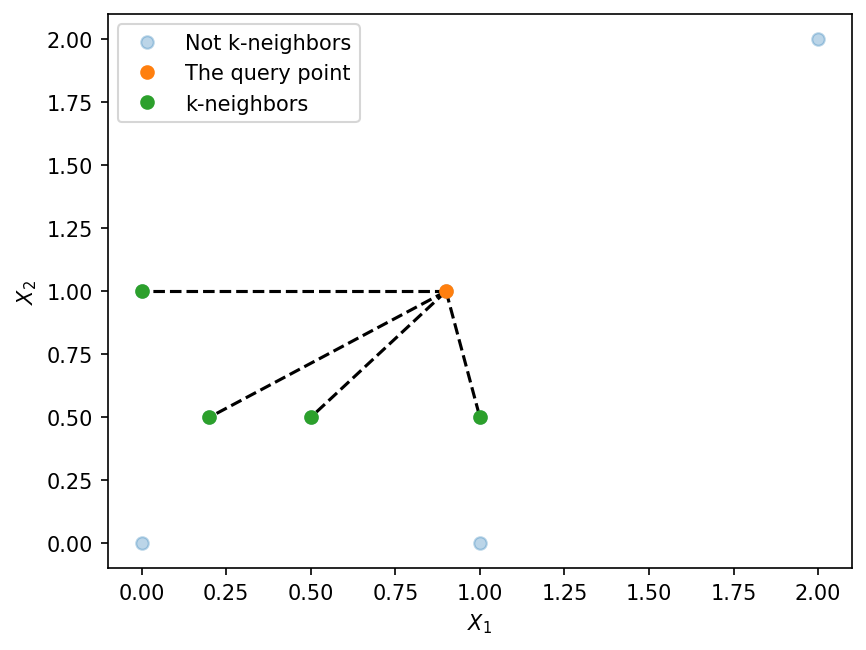

In [7]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

def plot_point_and_k_neighbors(X, highlight_index, n_neighbors=2):  #highlight_index  - індекс точки з вихідних даних
    "Plots the points in X, and shows the n_neighbors of the highlight_index-th point"
    nn = neighbors.NearestNeighbors(n_neighbors=n_neighbors).fit(X) #визначає сусідів
    dist, index = nn.kneighbors()  #дає дистанцію та індекси сусідів для кожної точки
    
    src_pt = X[highlight_index, :]
    
    plt.figure(dpi=150)
    # draw lines first, so points go on top
    for dest_index in index[highlight_index]:
        dest_pt = X[dest_index, :]
        plt.plot(*list(zip(src_pt, dest_pt)), 'k--')
    plt.plot(X[:, 0], X[:, 1], 'o', label='Not k-neighbors', alpha=0.3)
    plt.plot(*src_pt, 'o', label='The query point')
    plt.plot(X[index[highlight_index], 0], X[index[highlight_index], 1], 'o', label='k-neighbors')
    plt.xlabel('$X_1$')
    plt.ylabel('$X_2$')
    plt.legend()
    plt.show()
    
# Example of usage
plot_point_and_k_neighbors(X, 0, 4)

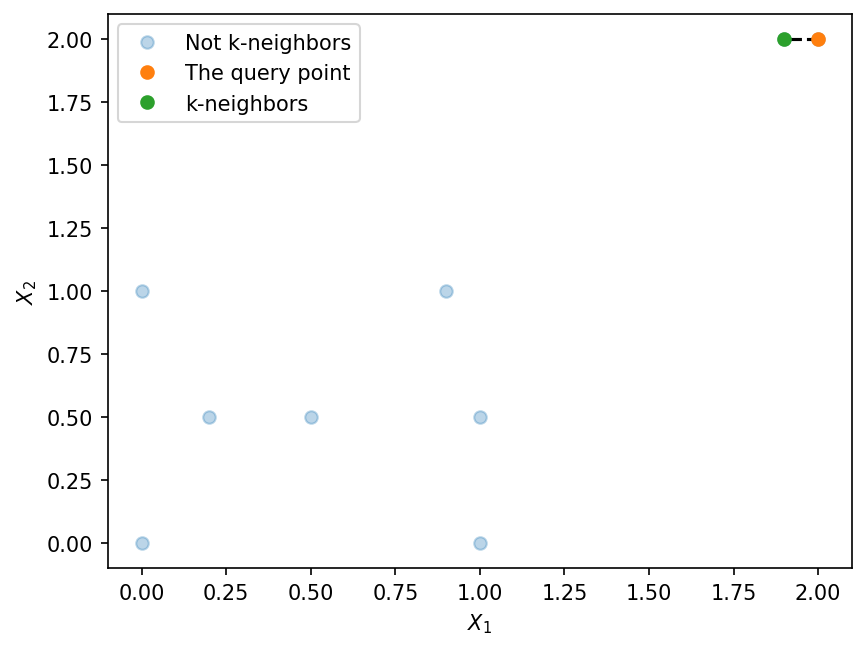

In [8]:
# Набір даних з двома суміжними аномаліями
X2 = np.concatenate([X, [[1.9, 2.0]]])

# Подивіться на найближчого сусіда (k=1)
plot_point_and_k_neighbors(X2, 7, n_neighbors=1)

In [9]:
def do_nn_avg_scores(obs, n_neighbors=1):

    nn = NearestNeighbors(n_neighbors=n_neighbors+1)  # n_neighbors+1, бо перший сусід - це сама точка
    nn.fit(obs)
    
    distances, _ = nn.kneighbors(obs)  # Отримуємо відстані до найближчих сусідів
    scores = np.mean(distances[:, 1:], axis=1)  # Беремо середнє без врахування першого сусіда (самої точки)
    
    return scores

# Test
do_nn_avg_scores(X2, n_neighbors=3)

array([0.6701, 0.7152, 0.7168, 0.7485, 0.4801, 0.459 , 0.5033, 1.1298,
       1.0878])

In [18]:
def print_ranked_scores(obs, scores):
    scores_and_obs = sorted(zip(scores, obs), key=lambda t: t[0], reverse=True) # обєднали два кортежі даних і відсортували по відстін
    print('Rank  Point\t\tScore')
    print('------------------------------')
    for index, score_ob in enumerate(scores_and_obs):
        score, point = score_ob
        print(f'{index+1:3d}.  {point}\t\t{score:6.4f}')

# Подивіться на викиди, використовуючи 3 сусідніх
print_ranked_scores(X2, do_nn_avg_scores(X2, 3))

Rank  Point		Score
------------------------------
  1.  [2. 2.]		1.1298
  2.  [1.9 2. ]		1.0878
  3.  [0. 0.]		0.7485
  4.  [1. 0.]		0.7168
  5.  [0. 1.]		0.7152
  6.  [0.9 1. ]		0.6701
  7.  [1.  0.5]		0.5033
  8.  [0.5 0.5]		0.4801
  9.  [0.2 0.5]		0.4590


<h1>Вправа 2</h1>

In [11]:
from scipy.stats import hmean
def do_nn_harm_scores(obs, n_neighbors=1):
  
    nn = NearestNeighbors(n_neighbors=n_neighbors+1)  
    nn.fit(obs)
    
    distances, _ = nn.kneighbors(obs)  # Отримуємо відстані до найближчих сусідів
    scores = hmean(distances[:, 1:], axis=1)  

    return scores
# Test 
do_nn_harm_scores(X2, n_neighbors=3)

array([0.6403, 0.6846, 0.6705, 0.7024, 0.4351, 0.4257, 0.5033, 0.2672,
       0.266 ])

In [12]:
print_ranked_scores(X2, do_nn_harm_scores(X2, 3))

Rank  Point		Score
------------------------------
  1.  [0. 0.]		0.7024
  2.  [0. 1.]		0.6846
  3.  [1. 0.]		0.6705
  4.  [0.9 1. ]		0.6403
  5.  [1.  0.5]		0.5033
  6.  [0.5 0.5]		0.4351
  7.  [0.2 0.5]		0.4257
  8.  [2. 2.]		0.2672
  9.  [1.9 2. ]		0.2660


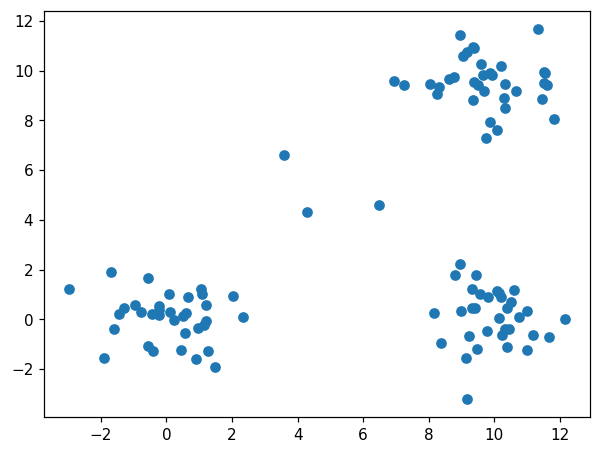

In [14]:
blobs_X, cluster_labels = sk_data.make_blobs(centers=[[0,0], [10,10], [10,0]])
anomalies, _ = sk_data.make_blobs(centers=[[5,5]], n_samples=5, cluster_std=3, random_state=42)

data = np.concatenate([blobs_X, anomalies])
cluster_labels = np.concatenate([cluster_labels, [-1]*len(anomalies)])

# Display the data before clustering
plt.figure(dpi=110)
plt.plot(data[:, 0], data[:, 1], 'o');
plt.show()



In [15]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3).fit(data)
centers = km.cluster_centers_[km.labels_]
# покажіть центри для перших 10 точок
centers[:10]

array([[0.1961, 0.1949],
       [9.8419, 0.2297],
       [0.1961, 0.1949],
       [0.1961, 0.1949],
       [9.8419, 0.2297],
       [9.8419, 0.2297],
       [9.8419, 0.2297],
       [0.1961, 0.1949],
       [0.1961, 0.1949],
       [9.5841, 9.4678]])

In [16]:
score = np.linalg.norm(data - centers, axis=1)
score

array([2.7434, 0.7642, 0.1364, 0.8476, 0.8971, 2.3217, 0.7129, 0.8272,
       1.0361, 1.5422, 3.3326, 0.8629, 1.92  , 1.4719, 0.6795, 0.9283,
       1.8615, 0.5024, 1.265 , 2.4757, 2.5352, 1.0834, 1.6052, 0.8551,
       1.4583, 0.3713, 0.4264, 1.4827, 2.1811, 1.5967, 1.9054, 0.2304,
       1.3816, 1.8805, 0.4683, 1.2011, 0.839 , 1.4449, 0.9447, 1.0458,
       1.8873, 0.9348, 1.3441, 0.9739, 1.9504, 0.8065, 1.6377, 1.1766,
       0.7934, 2.0504, 1.5437, 1.6887, 1.1034, 0.0926, 0.4013, 1.2051,
       0.9625, 0.6879, 1.5815, 0.6526, 2.0203, 1.2356, 3.4925, 1.4595,
       1.6436, 1.1057, 1.4688, 0.8432, 0.593 , 2.0549, 0.7387, 0.8222,
       1.3344, 1.9406, 2.1268, 0.9359, 0.5278, 2.3276, 0.3519, 1.9815,
       2.0174, 1.2276, 2.8089, 1.9969, 2.6516, 1.2511, 1.8888, 1.8166,
       0.2296, 1.5126, 0.8578, 1.9374, 0.3078, 0.5714, 0.5089, 0.978 ,
       0.904 , 0.3165, 1.105 , 0.5468, 5.8013, 2.643 , 6.6315, 5.4959,
       2.1709])

In [17]:
np.argsort(score)[::-1][:5]

array([102, 100, 103,  62,  10])

In [19]:
import numpy as np
from sklearn.cluster import KMeans

def do_cluster_outlier_scores(obs, n_clusters=3):

    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(obs)
    centers = kmeans.cluster_centers_

    # Обчислення відстаней від кожної точки до центроїда її кластера
    scores = np.linalg.norm(obs - centers[clusters], axis=1)

    # Отримуємо індекси 5 найбільших аномалій
    sort_scores = np.argsort(scores)[-5:][::-1]

    return sort_scores

# Тестування
do_cluster_outlier_scores(data, n_clusters=3)

array([102, 100, 103,  62,  10])

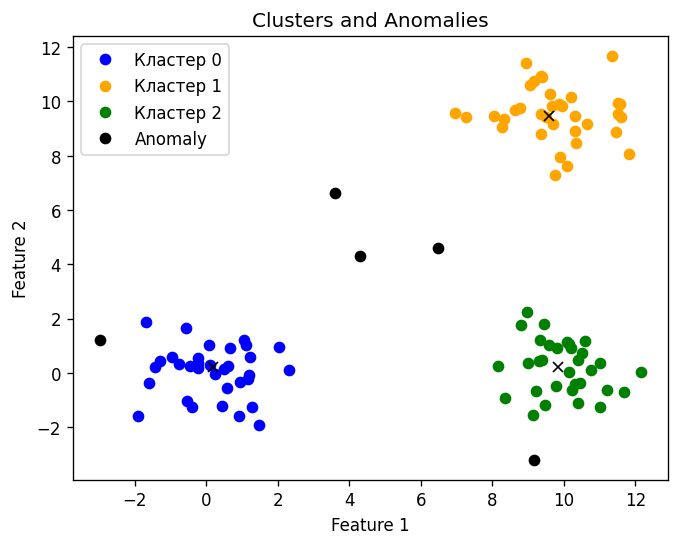

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def plot_clusters_and_outliers(obs, n_clusters=3, n_anomalies=5):
    # Виконуємо кластеризацію
    km = KMeans(n_clusters=n_clusters, random_state=42).fit(obs)

    # Обчислюємо відстані від кожної точки до центроїда
    centers = km.cluster_centers_
    scores = np.linalg.norm(obs - centers[km.labels_], axis=1)

    # Отримуємо індекси найбільш аномальних точок
    anomaly_idx = np.argsort(scores)[::-1][:n_anomalies]
    anomaly_mask = np.zeros(len(obs))
    anomaly_mask[anomaly_idx] = 1

    # Створюємо графік
    plt.figure(dpi=120)
    colors = ['blue', 'orange', 'green']

    # Малюємо кластери
    for label, color in enumerate(colors):
        mask = (km.labels_ == label) & (anomaly_mask == 0)
        plt.plot(obs[mask, 0], obs[mask, 1], marker='o', linestyle='none',
                 color=color, label=f'Кластер {label}')
        plt.plot(*centers[label], marker='x', color='k')

    # Малюємо аномальні точки
    plt.plot(obs[anomaly_idx, 0], obs[anomaly_idx, 1], marker='o', linestyle='none',
             color='k', label='Anomaly')

    # Додаємо легенду та виводимо графік
    plt.legend()
    plt.title('Clusters and Anomalies')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Тестування
plot_clusters_and_outliers(data, n_clusters=3, n_anomalies=5)